# Introducation


*Online payment has emerged as the dominant transaction method worldwide. However, this surge in online payments has been accompanied by an alarming increase in payment fraud incidents. The primary aim of this study is to distinguish between fraudulent and non-fraudulent online payments. To achieve this objective, we utilize a dataset sourced from Kaggle, containing historical data pertaining to fraudulent transactions. This dataset serves as a valuable resource for the identification and prevention of online payment fraud.

The dataset consists of 10 variables:

1.step: represents a unit of time where 1 step equals 1 hour
2.type: type of online transaction
3.amount: the amount of the transaction
4.nameOrig: customer starting the transaction
5.oldbalanceOrg: balance before the transaction
6.newbalanceOrig: balance after the transaction
7.nameDest: recipient of the transaction
8.oldbalanceDest: initial balance of recipient before the transaction
9.newbalanceDest: the new balance of recipient after the transaction
10.isFraud: fraud transaction*

In [1]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import  random

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('onlinefraud.csv')

df.drop('isFlaggedFraud',axis = 1,inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.4+ MB


*The dataset consist of 1,10,812 observations.*

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
62995,9,PAYMENT,2569.82,C1324862144,0.00,0.00,M1249741046,0.0,0.0,0.0
16168,8,PAYMENT,1351.67,C1336077392,78933.00,77581.33,M902885640,0.0,0.0,0.0
34999,8,PAYMENT,3783.65,C1286780540,213783.29,209999.64,M1679051236,0.0,0.0,0.0
8805,7,PAYMENT,3956.77,C1631050884,0.00,0.00,M586261312,0.0,0.0,0.0
4093,3,PAYMENT,991.75,C1042863993,16919.00,15927.25,M354502944,0.0,0.0,0.0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

In [5]:
df.dropna(axis=0,inplace = True)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

*There are no missing values.*

In [7]:
fraud_min_max = [
    ['amount',df.amount.min(),df.amount.max()],
    ['oldbalanceOrg',df.oldbalanceOrg.min(),df.oldbalanceOrg.max()],
    ['newbalanceOrig',df.newbalanceOrig.min(),df.newbalanceOrig.max()],
    ['oldbalanceDest',df.oldbalanceDest.min(),df.oldbalanceDest.max()],
    ['isFraud',df.isFraud.min(),df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,headers=['columns','min_value','max_value'],
        showindex=True,tablefmt='github',numalign='right'
    )
)

|    | columns        |   min_value |   max_value |
|----|----------------|-------------|-------------|
|  0 | amount         |        0.32 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.37974e+07 |
|  2 | newbalanceOrig |           0 | 3.40087e+07 |
|  3 | oldbalanceDest |           0 | 3.13069e+07 |
|  4 | isFraud        |           0 |           1 |


In [8]:
# Downcast numerical columns with smaller dtype

for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = pd.to_numeric(df[col],downcast='float')
  if df[col].dtype == 'int64':
    df[col] = pd.to_numeric(df[col],downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [9]:
# Check duplicate values
df.duplicated().sum()

0

*There are no duplicate values*

In [10]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

# Univariate data Visualization

In [11]:
df['step'].value_counts()

9     37628
8     21097
10    10834
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64

*There are 11 steps , and every step has at least 500 occurrences*

Text(0, 0.5, 'Number of transactions')

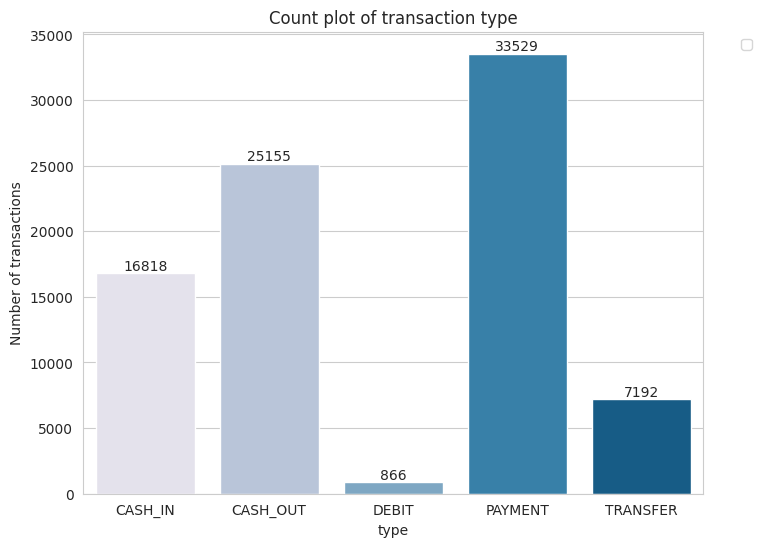

In [12]:
ax = sns.countplot(x='type',data=df,palette='PuBu')
for container in ax.containers:
  ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.ylabel('Number of transactions')

*'PAYMENT' is the most numerous transaction type, followed by payment, cash in, transfer and debit types*

Text(0.5, 1.0, 'Distribution of transaction amount')

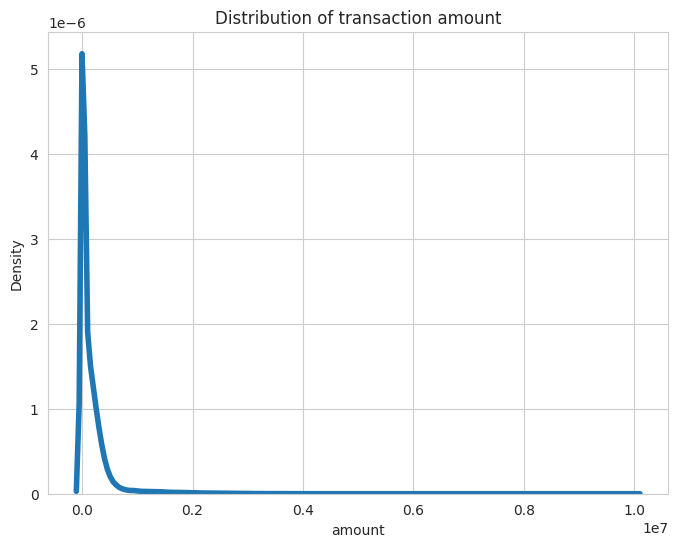

In [13]:
sns.kdeplot(df['amount'],linewidth=4)
plt.title('Distribution of transaction amount')

*1.The distribution of transaction is 'Right skewed'
2.This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
3.(Mode < Median < Mean)*

In [14]:
df['nameOrig'].value_counts()

C1231006815    1
C997094059     1
C958960621     1
C339685866     1
C458809795     1
              ..
C1104315585    1
C872759772     1
C1479228131    1
C1690594729    1
C722886752     1
Name: nameOrig, Length: 83560, dtype: int64

*There are 83560 initial customers, and every step has at least 1 occurrence.*

Text(0.5, 1.0, 'Distribution of transaction amount')

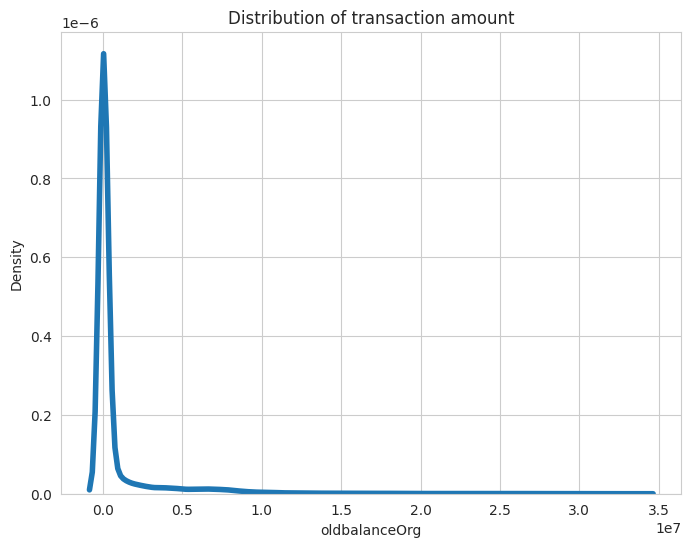

In [15]:
sns.kdeplot(df['oldbalanceOrg'],linewidth=4)
plt.title('Distribution of transaction amount')

*The distribution of pre-transaction balances of the initial customers is right skewed.*

Text(0.5, 1.0, 'Distribution of transaction amount')

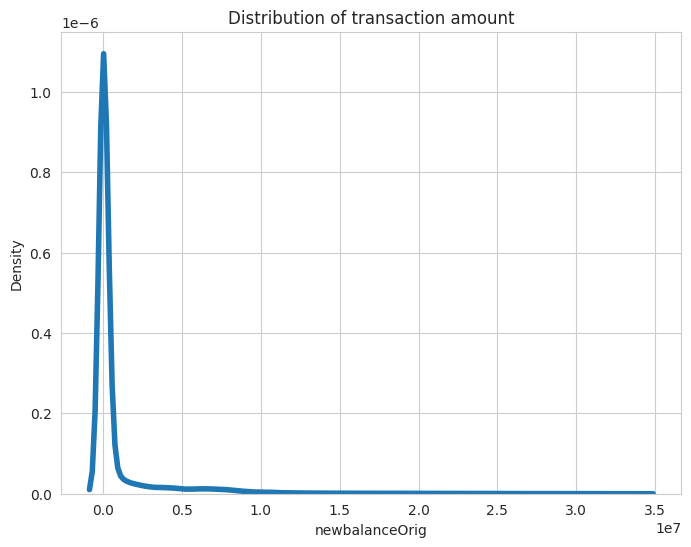

In [16]:
sns.kdeplot(df['newbalanceOrig'],linewidth=4)
plt.title('Distribution of transaction amount')

*The distribution of post-transaction balances of the initial customers is right skewed.*

In [17]:
df['nameDest'].value_counts()

C985934102     78
C1286084959    69
C248609774     69
C1590550415    67
C2083562754    65
               ..
M1745749427     1
M1232968184     1
M1090964764     1
M687125693      1
C1492538502     1
Name: nameDest, Length: 43957, dtype: int64

*There are 43957 recipients, and every step has at least 1 occurrence.*

Text(0.5, 1.0, 'Distribution of transaction amount')

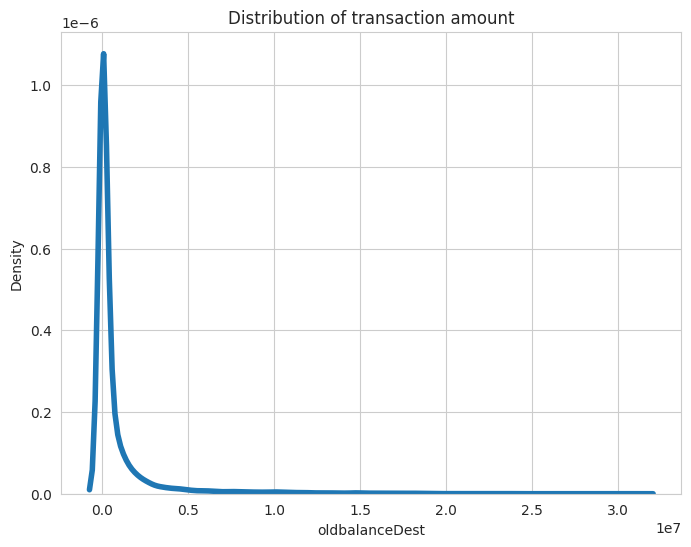

In [18]:
sns.kdeplot(df['oldbalanceDest'],linewidth=4)
plt.title('Distribution of transaction amount')

*The distribution of pre-transaction balances of the recipient is right skewed*

Text(0.5, 1.0, 'Distribution of transaction amount')

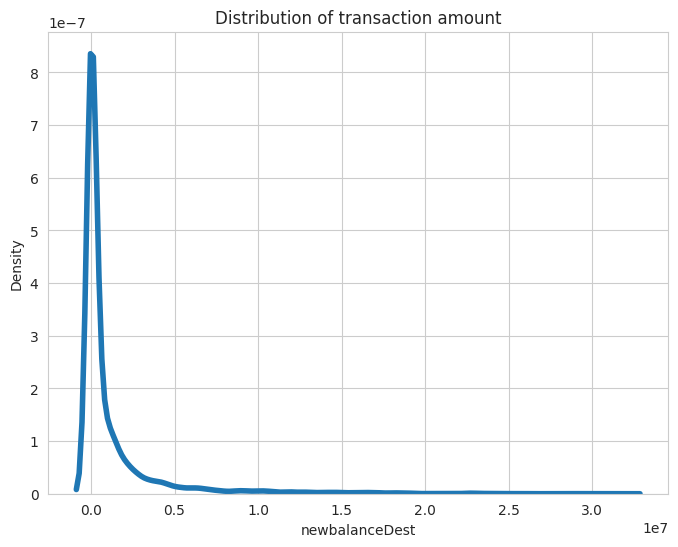

In [19]:
sns.kdeplot(df['newbalanceDest'],linewidth=4)
plt.title('Distribution of transaction amount')

*The distribution of post-transaction balances of the recipient is right skewed.*

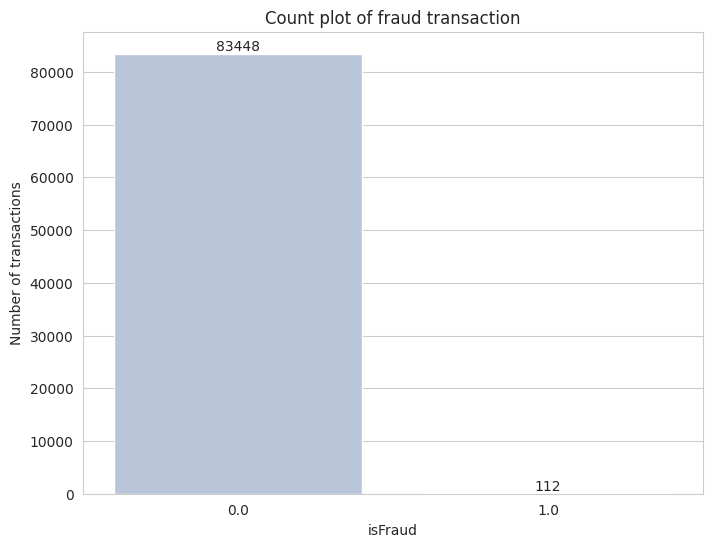

In [20]:
ax = sns.countplot(x='isFraud',data=df,palette='PuBu')
for container in ax.containers:
  ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

*There are much more non-fraudulent transactions than fraudulent transactions.*

# Bivariate data visualization

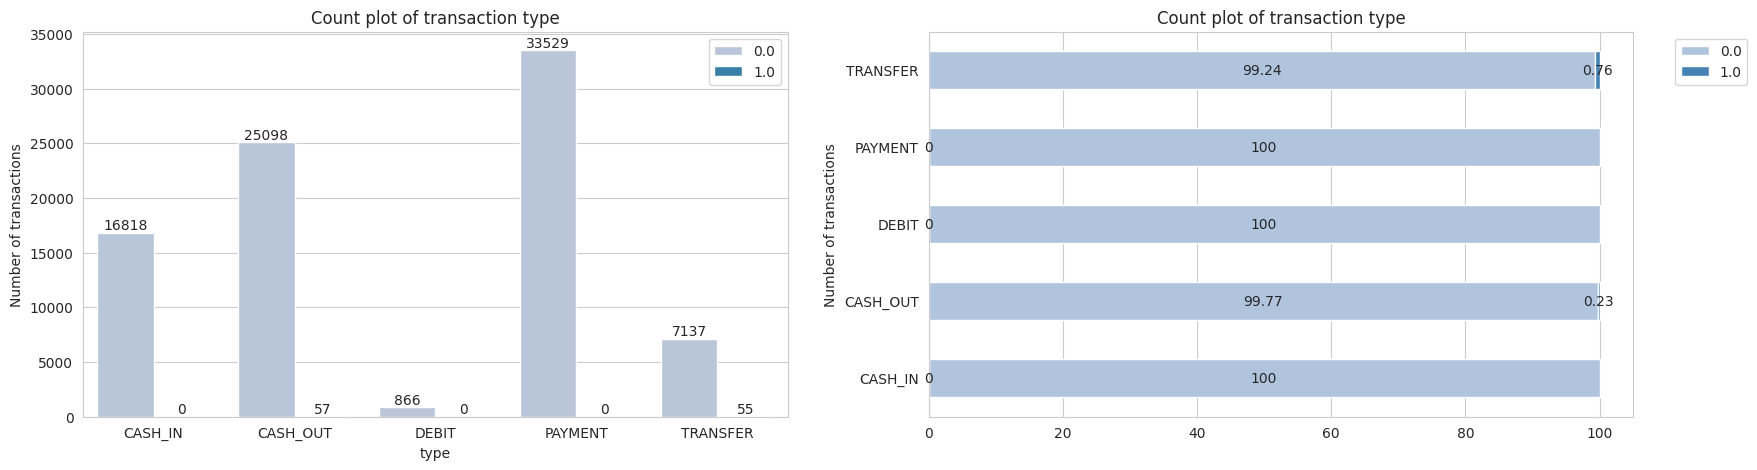

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

*Fraudulent transactions only occur in debit and transfer types.*

Text(0, 0.5, 'Number of transactions')

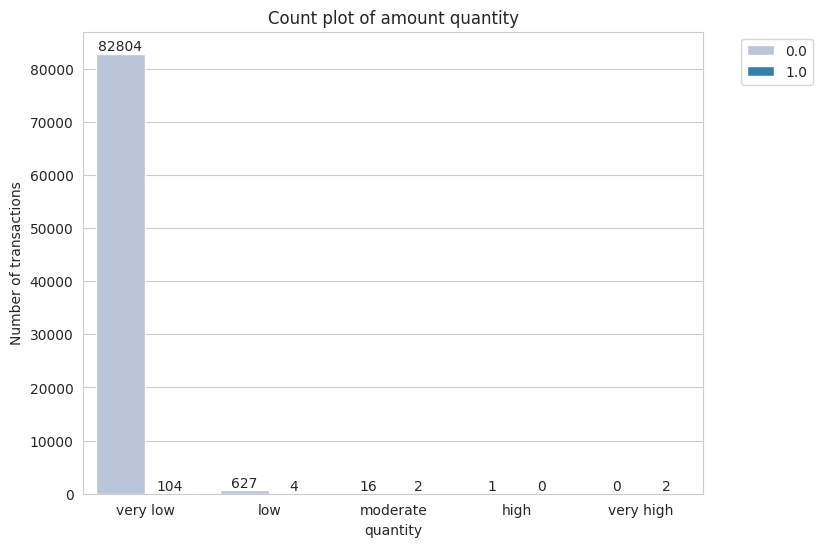

In [22]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* 1. All fraudulent transactions fall into the category of very low amounts.
 2. This suggests that in most cases, small transactions are more prone to fraudulent transactions.*

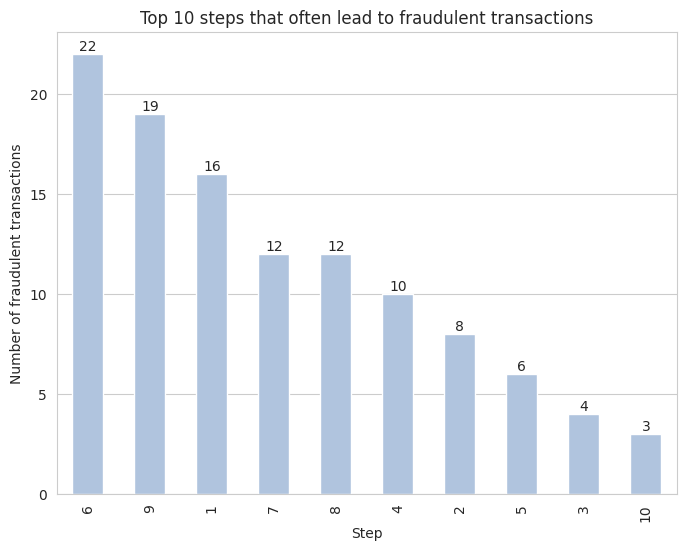

In [23]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

1. Step 6 has the highest number of fraudulent transactions, 22 cases.
2. This indicates that Step 6 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

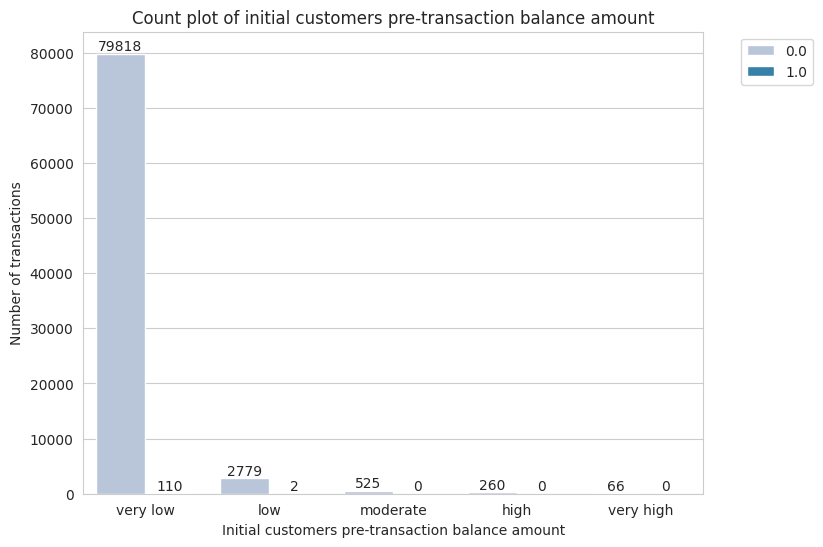

In [24]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

1. Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions.
2. This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

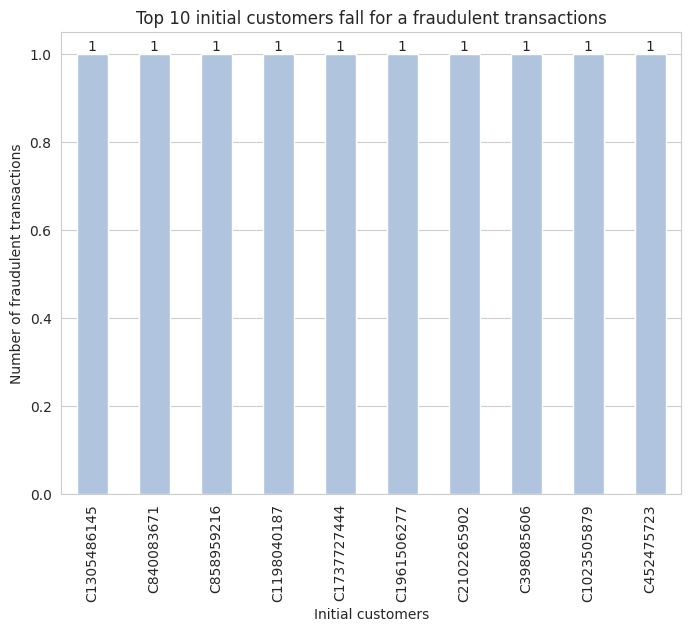

In [25]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

Initial customers are scammed of at most one for a fraudulent transaction

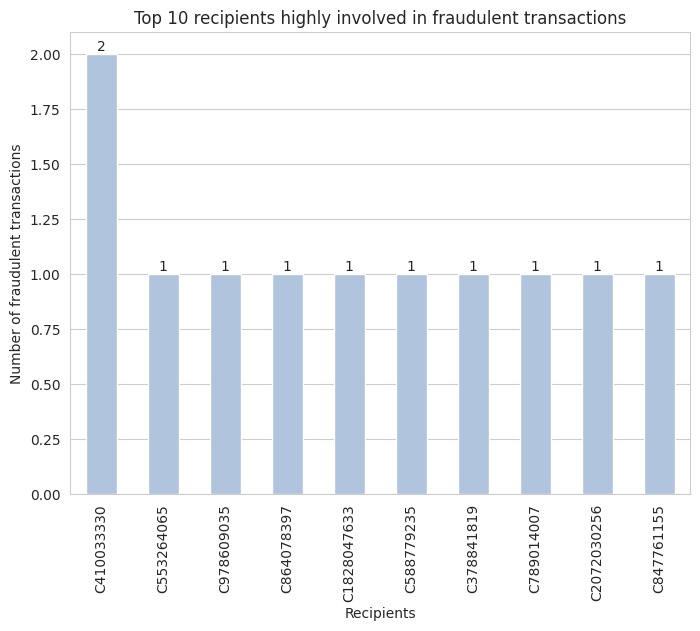

In [26]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Suspicious recipients only have a maximum of 2 involved fraudulent transactions

Text(0.5, 0, 'Recipient pre-transaction balance amount')

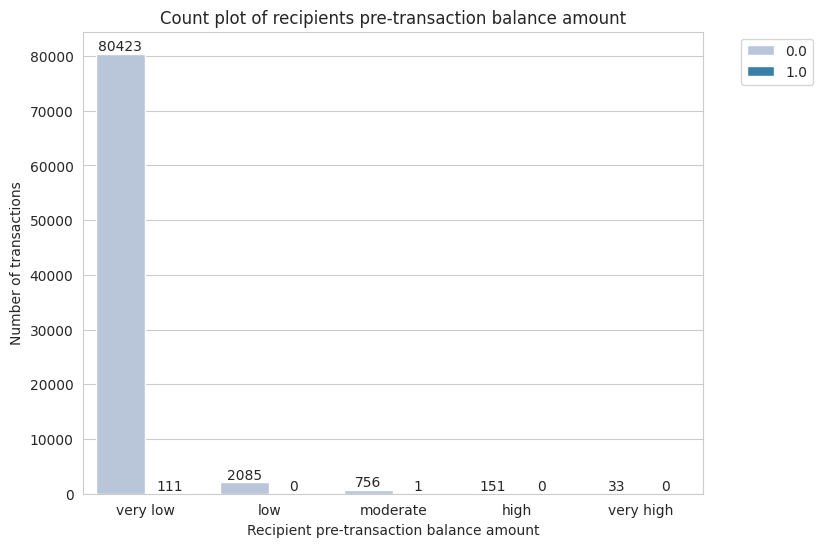

In [27]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

1. Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.
2. This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

# Multivariate data visualization

<ipython-input-28-f0e0de9688db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr('spearman')


Text(0.5, 1.0, 'Correlation')

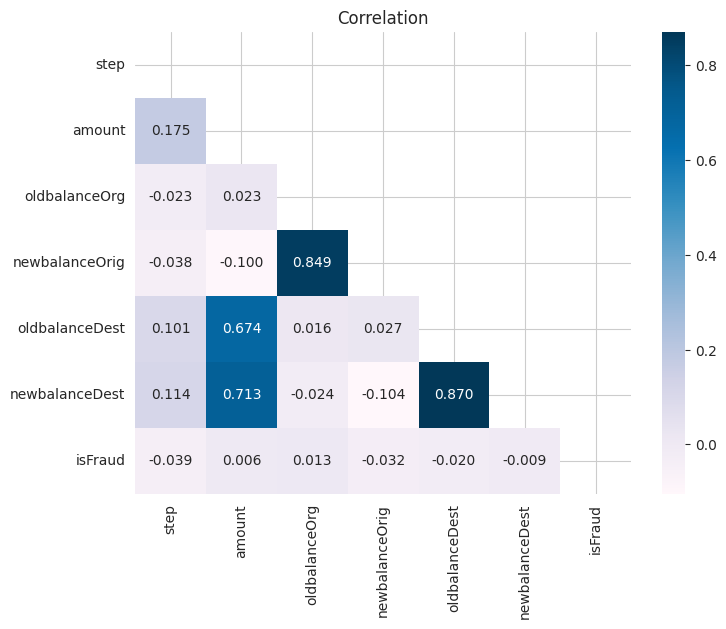

In [28]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

1. oldbalanceOrg and newbalanceOrig has strong positive relationship.
2. oldbalanceDest and newbalanceDest has strong positive relationship.
3. oldbalanceOrg and amount has weak positive relationship.
4. newbalanceOrig and amount has moderate positive relationship.

# Model Building

In [29]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud.

In [31]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [32]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

In [33]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [34]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.910 (0.021)
Mean precision score: 0.903 (0.034)
Mean recall score: 0.921 (0.045)
Mean f1 score: 0.911 (0.023)
Mean roc_auc score: 0.990 (0.007)


Logistic Regression:
Mean accuracy score: 0.888 (0.039)
Mean precision score: 0.881 (0.046)
Mean recall score: 0.899 (0.041)
Mean f1 score: 0.889 (0.037)
Mean roc_auc score: 0.955 (0.030)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.92      1.00      0.96     15304
    Fraud [1]       0.96      0.02      0.03      1408

     accuracy                           0.92     16712
    macro avg       0.94      0.51      0.49     16712
 weighted avg       0.92      0.92      0.88     16712
 



Text(0.5, 0, 'False Positive Rate')

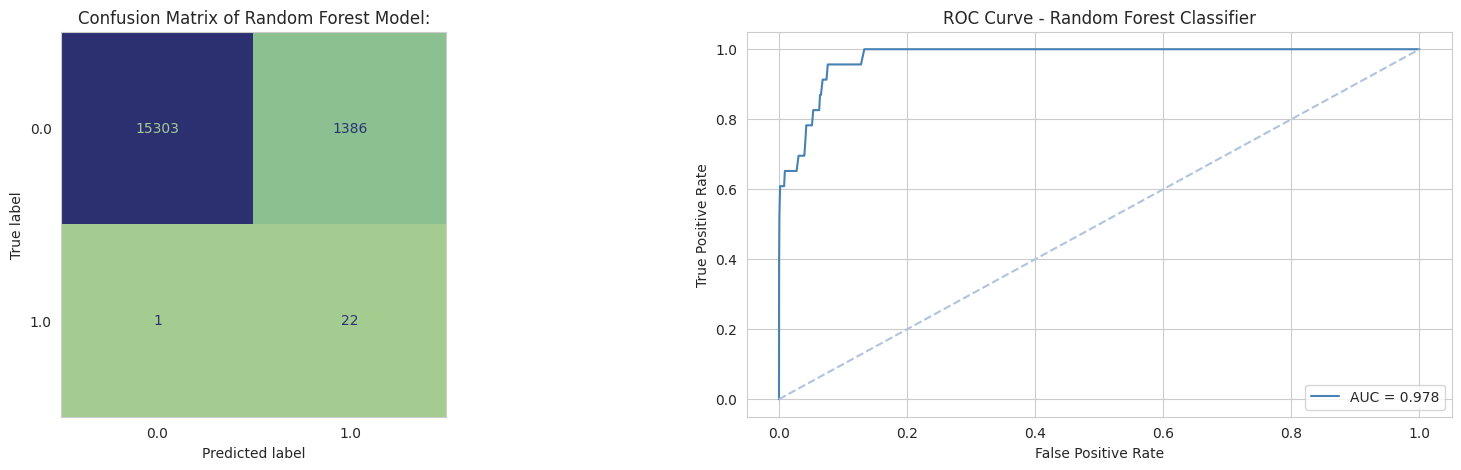

In [35]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

1. From the confusion matrix, 1,239,155 were correctly classified as non-fraudulent payments, and 31,726 people were misclassified as non-fraudulent payments.
2. According to the confusion matrix, 1,639 payments were incorrectly labelled as fraud while 4 payments were correctly identified as fraud.

# Conclusion

1. Random Forest obtains the highest score of all using K-fold cross-validation.
2. The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments, as the AUC is 0.978, which is close to 1. This means it has a good separability measure, and the model has an 97.8% chance of being able to distinguish between positive and negative classes..